<a href="https://colab.research.google.com/github/anilkumar4274/aiassignments/blob/sharath/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.cluster import KMeans

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
df=pd.read_csv('income.csv')

In [0]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [0]:
df.shape

(22, 3)

In [0]:
km=KMeans(n_clusters=3)

In [0]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [0]:
df['cluster']=y_predicted

In [0]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [0]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


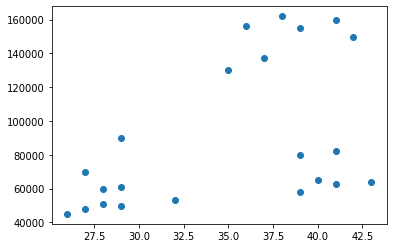

In [0]:
plt.scatter(df['Age'],df['Income($)'])

In [0]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

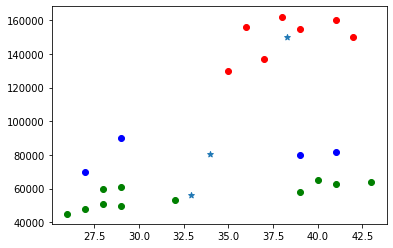

In [0]:
plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,-1],marker='*',label='Centroid')

In [0]:
scaler=MinMaxScaler()

In [0]:
df['Income($)']=scaler.fit_transform(df[['Income($)']])

In [0]:
df['Age']=scaler.fit_transform(df[['Age']])

In [0]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [0]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted

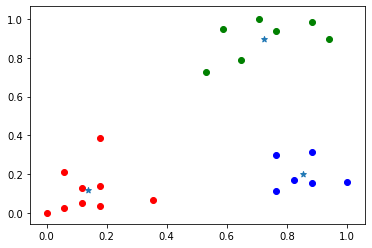

In [0]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,-1],marker='*',label='Centroid')

# Elbow Plot

In [0]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

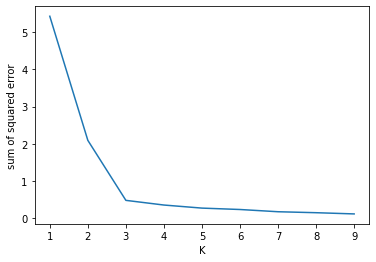

In [0]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)